In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

In [8]:
# 生成数据
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2*r, 'fast': 4*r})
print(df.shape)

df.head()

(100, 4)


,r,slow,medium,fast
0,0.00000,0.00000,0.000000,0.000000
1,0.10101,0.10101,0.202020,0.404040
2,0.20202,0.20202,0.404040,0.808081
3,0.30303,0.30303,0.606061,1.212121
4,0.40404,0.40404,0.808081,1.616162


$pd.melt()$ 是 $df.pivot()$ 逆转操作函数，将列名转换为列数据(columns name → column values)，重构DataFrame   [[link]](https://blog.csdn.net/mingkoukou/article/details/82867218)
> 如果说 df.pivot() 将长数据集转换成宽数据集，df.melt() 则是将宽数据集变成长数据集

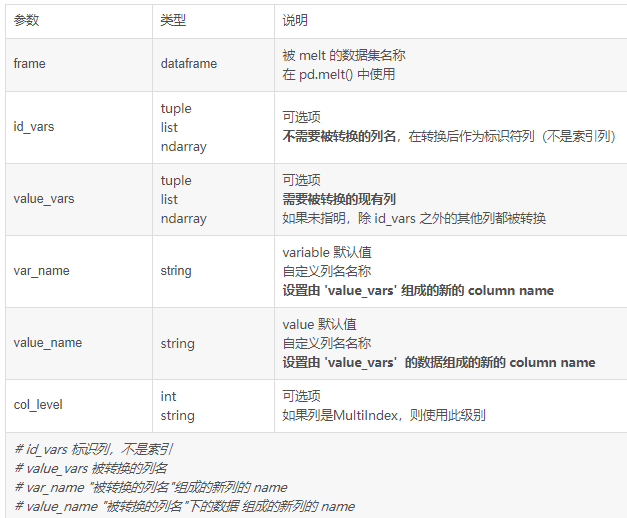

In [11]:
_df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')
print(_df.shape)

_df

(300, 3)


,r,speed,theta
0,0.00000,slow,0.000000
1,0.10101,slow,0.101010
2,0.20202,slow,0.202020
3,0.30303,slow,0.303030
4,0.40404,slow,0.404040
...,...,...,...
295,9.59596,fast,38.383838
296,9.69697,fast,38.787879
297,9.79798,fast,39.191919
298,9.89899,fast,39.595960


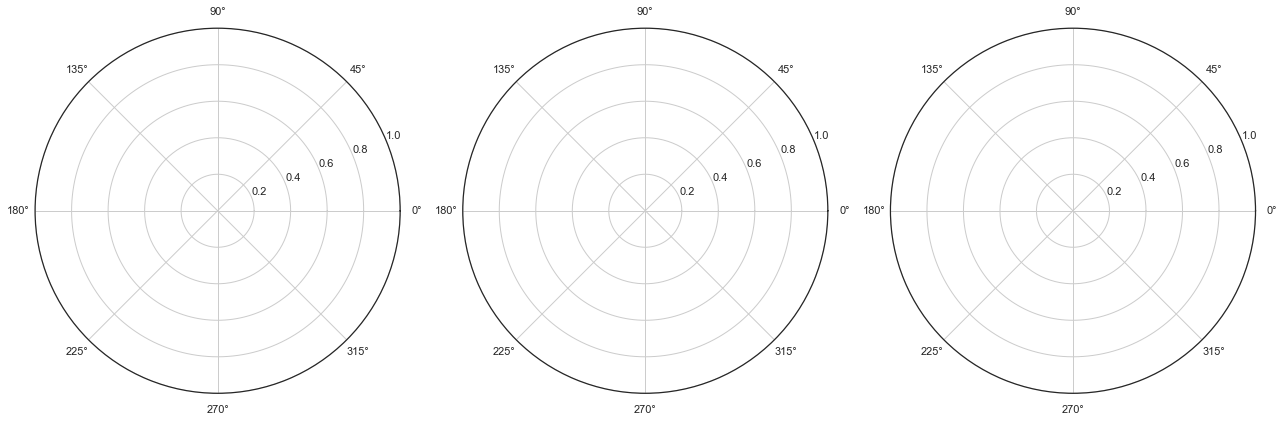

In [13]:
# 设置具有极坐标投影的轴网格

g = sns.FacetGrid(_df, col='speed', hue='speed', 
                  subplot_kws=dict(projection='polar'), height=6,    # 生成高度为6的极坐标网格
                  sharex=False, sharey=False, despine=False)        # 彼此不共享坐标轴，图脊关掉

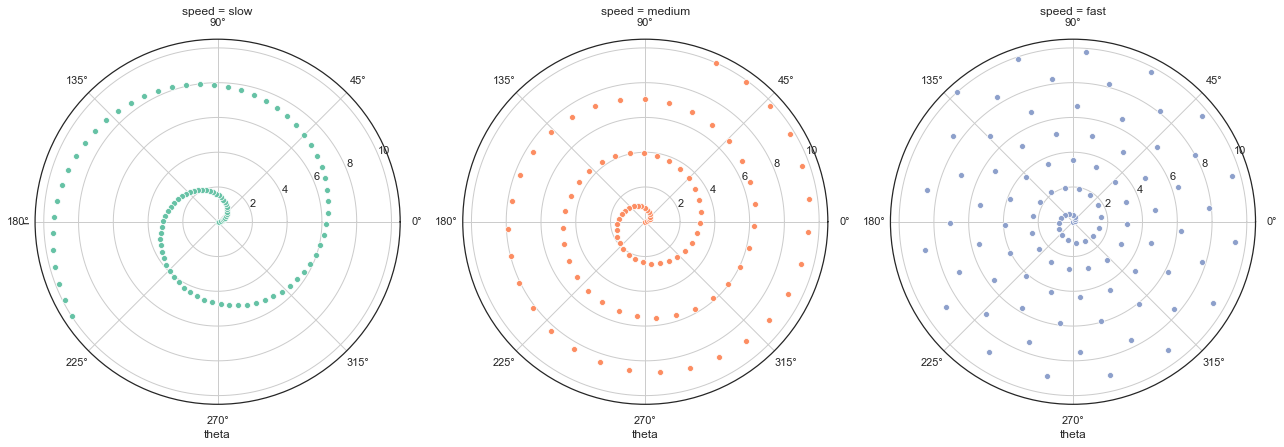

In [15]:
# 设置具有极坐标投影的轴网格

g = sns.FacetGrid(_df, col='speed', hue='speed', palette='Set2', 
                  subplot_kws=dict(projection='polar'), height=6,
                  sharex=False, sharey=False, despine=False)

# 在网格中的每个轴上绘制散点图
g.map(sns.scatterplot, 'theta', 'r')